<a href="https://colab.research.google.com/github/Marziesoltani/predicting-dust-phenomenon/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Mining Course Project

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/DM Project

/content/drive/My Drive/DM Project


In [ ]:
!pip install scikit-plot

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import sklearn.feature_selection
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import scikitplot as skplt
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
from sklearn.decomposition import FactorAnalysis
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


#Dataset With All Variables

In [ ]:
df_all = pd.read_csv('Pixels.csv')
df_all.head()

cell number    Range  ...  Autumn Snowy Days  Annual Snowy Days
0            1  [1, 15)  ...               0.00               0.02
1            2  [1, 15)  ...               0.01               0.05
2            3  [1, 15)  ...               0.02               0.09
3            4  [1, 15)  ...               0.01               0.07
4            5  [1, 15)  ...               0.00               0.00

[5 rows x 197 columns]

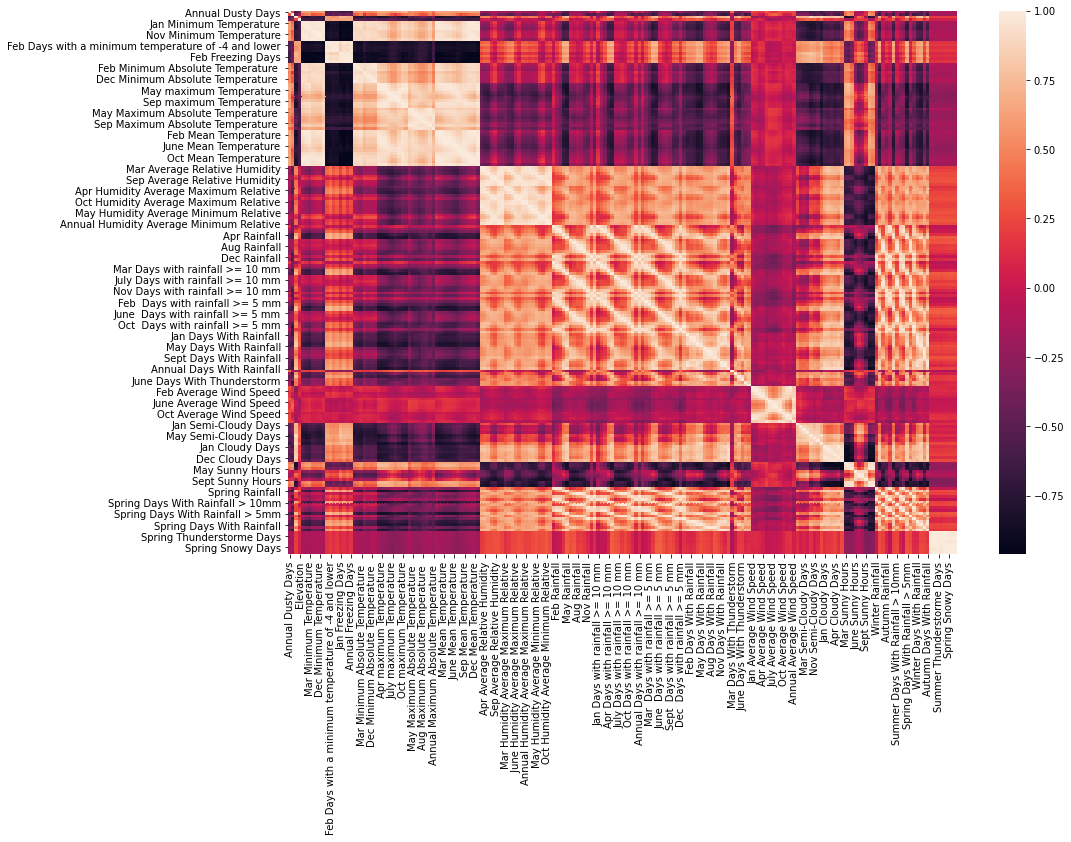

In [ ]:
df_heatmap = df_all.drop(['cell number', 'Range'], axis=1)
plt.figure(figsize=(15,10))
sns.heatmap(df_heatmap.corr())
#plt.savefig('Heatmap_all.png', dpi=520 , format='png', bbox_inches='tight')

#PCA For All Variables

In [ ]:
scalar = StandardScaler()
df_standard = df_all.iloc[: , 3:197]
scalar.fit(df_standard)
scaled_data = scalar.transform(df_standard)
pca = PCA(n_components = 6)
pca.fit(scaled_data)
X_pca = pca.transform(scaled_data)
Y_pca = StandardScaler().fit_transform(df_all[['Annual Dusty Days']])

In [ ]:
pca.components_

array([[-0.06461159,  0.08217301,  0.04303125, ...,  0.02901978,
         0.02940625,  0.02891072],
       [ 0.0022929 , -0.05482103, -0.07783789, ...,  0.01462346,
         0.01457688,  0.01455965],
       [-0.06509555, -0.02926449,  0.02336749, ..., -0.07846774,
        -0.07732083, -0.07873943],
       [ 0.00673884,  0.09640725, -0.05141344, ..., -0.02732173,
        -0.02677937, -0.02755175],
       [-0.07527361,  0.09577119, -0.14771557, ..., -0.06909303,
        -0.06742188, -0.06969307],
       [-0.06899873,  0.01840989, -0.02944904, ...,  0.321557  ,
         0.31767414,  0.32267273]])

In [ ]:
df_pca = pd.DataFrame(pca.components_ , columns=df_standard.columns)
df_pca

Longitude  Latitude  ...  Autumn Snowy Days  Annual Snowy Days
0  -0.064612  0.082173  ...           0.029406           0.028911
1   0.002293 -0.054821  ...           0.014577           0.014560
2  -0.065096 -0.029264  ...          -0.077321          -0.078739
3   0.006739  0.096407  ...          -0.026779          -0.027552
4  -0.075274  0.095771  ...          -0.067422          -0.069693
5  -0.068999  0.018410  ...           0.317674           0.322673

[6 rows x 194 columns]

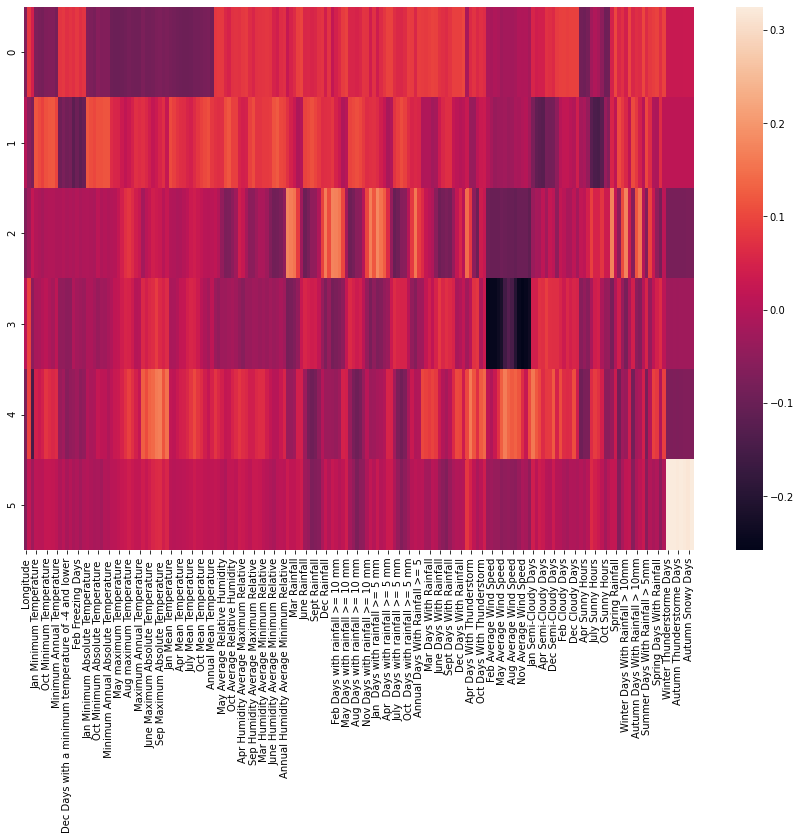

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df_pca)
#plt.savefig('Heatmap_PCA.png', dpi=520 , format='png', bbox_inches='tight')

**OLS PCA**

In [ ]:
X_pca_train, X_pca_test, Y_pca_train, Y_pca_test = train_test_split(X_pca, Y_pca, test_size=0.3, random_state=101)

In [ ]:
X_pca = sm.add_constant(X_pca) 
model_pca = sm.OLS(Y_pca_train, X_pca_train).fit()
print(model_pca.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.514
Model:                            OLS   Adj. R-squared (uncentered):              0.511
Method:                 Least Squares   F-statistic:                              155.1
Date:                Fri, 25 Jun 2021   Prob (F-statistic):                   3.55e-134
Time:                        09:21:28   Log-Likelihood:                         -937.65
No. Observations:                 886   AIC:                                      1887.
Df Residuals:                     880   BIC:                                      1916.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#FA For All Variables

In [ ]:
transformer = FactorAnalysis(n_components=10, random_state=0)
X_fa = transformer.fit_transform(df_standard)
Y_fa = df_all['Annual Dusty Days']

In [ ]:
df_fa = pd.DataFrame(transformer.components_, columns=df_standard.columns)
df_fa

Longitude  Latitude  ...  Autumn Snowy Days  Annual Snowy Days
0  -1.067972  0.828904  ...           0.103634           0.479450
1  -0.767801  0.745167  ...           1.435857           6.711961
2   2.038984 -2.688549  ...           0.042551           0.250443
3  -1.160334 -0.522426  ...           0.005272          -0.003262
4  -1.571185 -0.070604  ...           0.010980           0.039150
5   0.983807  0.109907  ...           0.016224           0.036995
6   1.799245 -1.302629  ...          -0.012629          -0.028261
7   0.253596  0.022330  ...           0.007811           0.014589
8   1.153427 -0.545869  ...           0.009885           0.026445
9  -2.072733 -0.647219  ...           0.014086           0.031741

[10 rows x 194 columns]

In [ ]:
X_fa_train, X_fa_test, Y_fa_train, Y_fa_test = train_test_split(X_fa, Y_fa, test_size=0.3, random_state=101)

In [ ]:
X_fa = sm.add_constant(X_fa) 
model_fa = sm.OLS(Y_fa_train, X_fa_train).fit()
print(model_fa.summary())

                            OLS Regression Results                            
Dep. Variable:      Annual Dusty Days   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     91.12
Date:                Fri, 25 Jun 2021   Prob (F-statistic):          2.71e-128
Time:                        09:21:42   Log-Likelihood:                -3723.5
No. Observations:                 886   AIC:                             7469.
Df Residuals:                     875   BIC:                             7522.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.9613      0.548     52.882      0.0

#Annual Dataset

In [ ]:
df = pd.read_csv('Pixels_Yearly.csv').dropna()
df.head()

cell number  ... Annual Days With Rainfall >= 5
0            1  ...                          21.36
1            2  ...                          20.11
2            3  ...                          20.29
3            4  ...                          20.60
4            5  ...                          20.95

[5 rows x 23 columns]

In [ ]:
df.describe()

cell number  ...  Annual Days With Rainfall >= 5
count  1267.000000  ...                     1267.000000
mean    634.000000  ...                       13.785509
std     365.895705  ...                        8.820697
min       1.000000  ...                        2.680000
25%     317.500000  ...                        7.110000
50%     634.000000  ...                       10.600000
75%     950.500000  ...                       19.155000
max    1267.000000  ...                       53.730000

[8 rows x 22 columns]

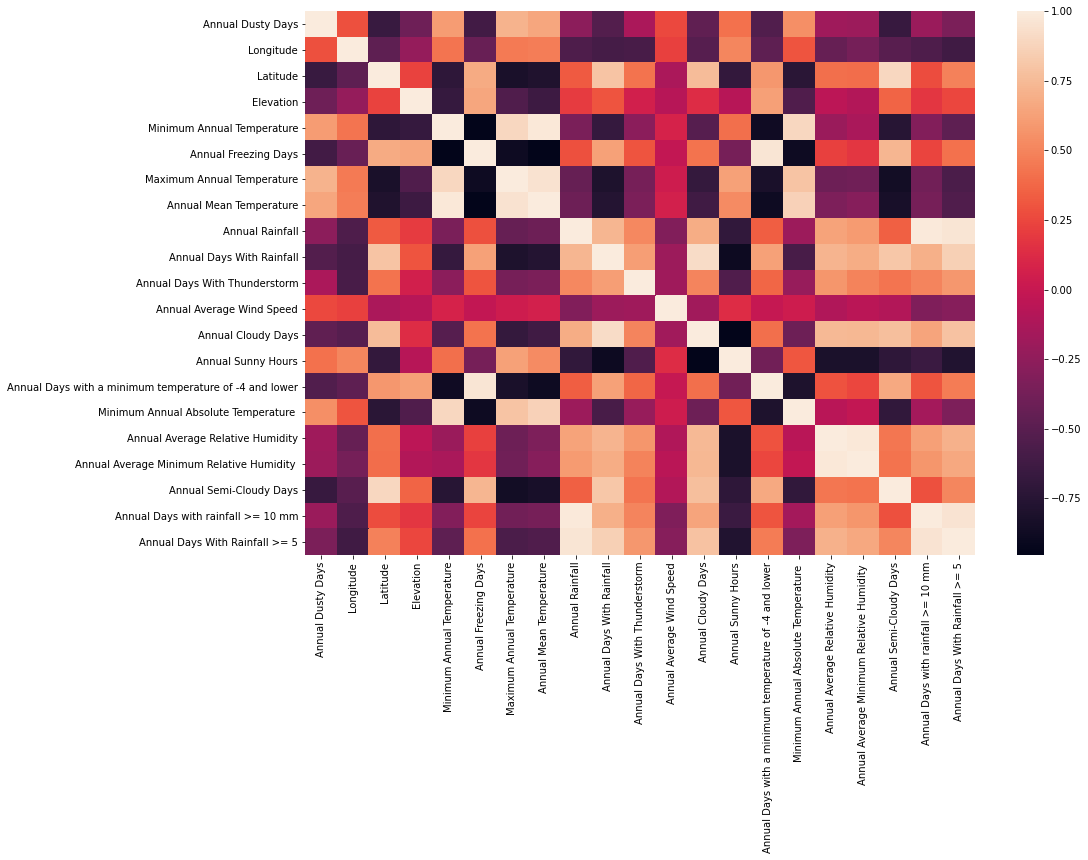

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(tmp.corr())
#plt.savefig('Heatmap.png', dpi=520 , format='png', bbox_inches='tight')

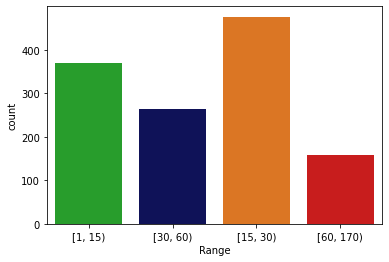

In [ ]:
colors = ["green", "darkblue", "orange", "red"]
sns.countplot(x="Range", data=df, palette=sns.xkcd_palette(colors))

Text(0.5, 1.0, 'Histogram of Annual Dusty Days: $\\mu=47$, $\\sigma=30$')

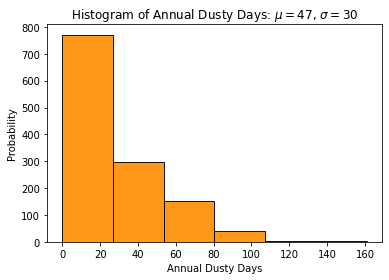

In [ ]:
plt.hist(df["Annual Dusty Days"],6,align='mid', color="darkorange",edgecolor='black',alpha=0.9)
plt.xlabel('Annual Dusty Days')
plt.ylabel('Probability')
plt.title(r'Histogram of Annual Dusty Days: $\mu=47$, $\sigma=30$')

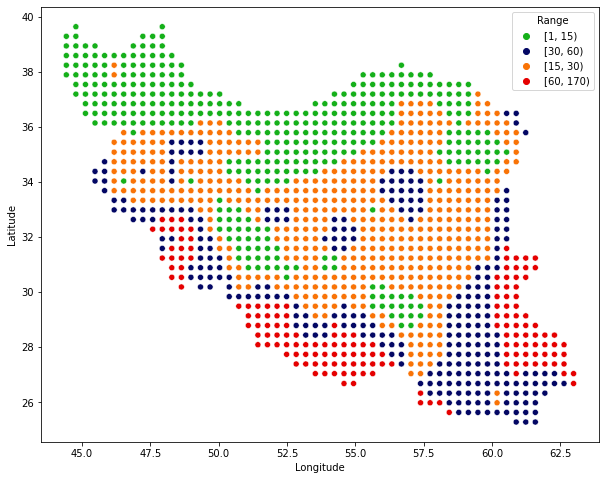

In [ ]:
plt.figure(figsize=(10,8))
colors = ["green", "darkblue", "orange", "red"]
sns.scatterplot(x="Longitude", y="Latitude", hue="Range", data=df, palette=sns.xkcd_palette(colors))

#Annual Dataset Analysis

In [ ]:
X = df.iloc[: , 3:]
Y = df['Annual Dusty Days']

In [ ]:
X1= df[['Annual Mean Temperature', 'Annual Days With Rainfall', 'Annual Average Wind Speed', 'Annual Days With Thunderstorm']]
Y1 = df['Annual Dusty Days']

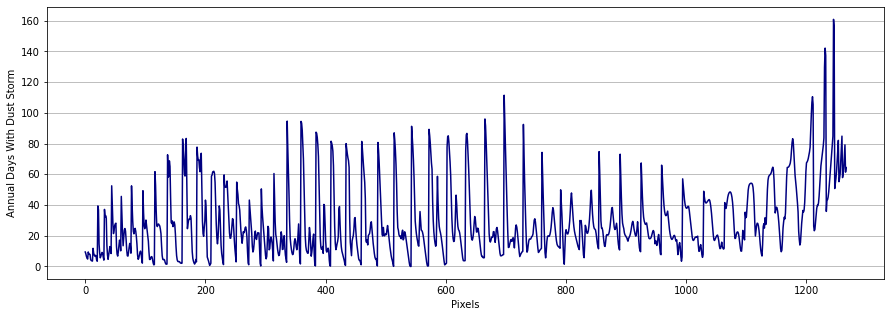

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(Y.index, Y.values, color='navy')
plt.xlabel('Pixels')
plt.ylabel('Annual Days With Dust Storm')
plt.grid(axis='y')
#plt.savefig('Dusty days.png', dpi=520 , format='png', bbox_inches='tight')

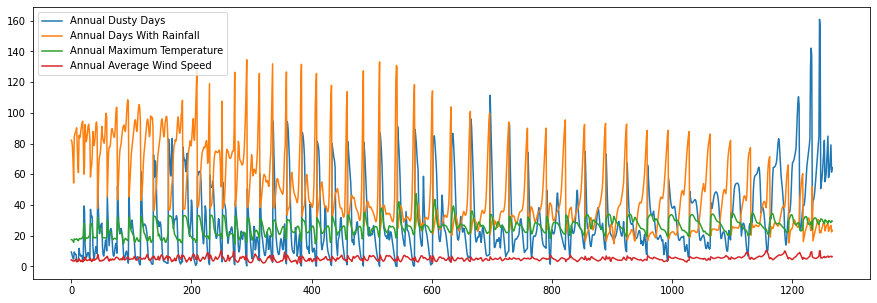

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(Y.index, Y.values, label='Annual Dusty Days')
plt.plot(Y.index, X['Annual Days With Rainfall'], label='Annual Days With Rainfall')
plt.plot(Y.index, X['Maximum Annual Temperature'],  label='Annual Maximum Temperature')
plt.plot(Y.index, X['Annual Average Wind Speed'],  label='Annual Average Wind Speed')
plt.legend()
#plt.savefig('3vip variables plot.png', dpi=520 , format='png', bbox_inches='tight')

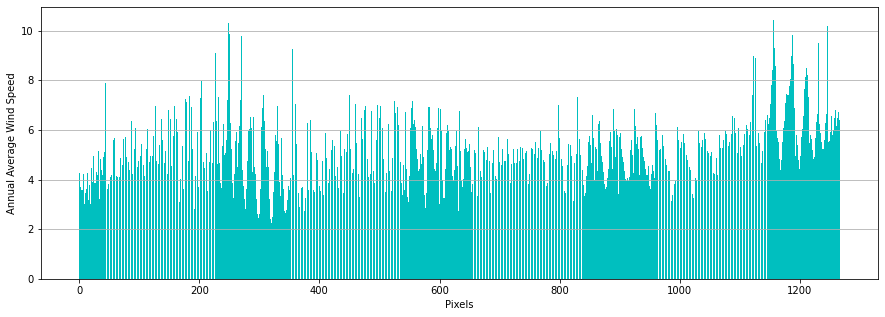

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(Y.index, X['Annual Average Wind Speed'], color='c')
plt.xlabel('Pixels')
plt.ylabel('Annual Average Wind Speed')
plt.grid(axis='y')
#plt.savefig('Annual Average Wind Speed.png', dpi=520 , format='png', bbox_inches='tight')

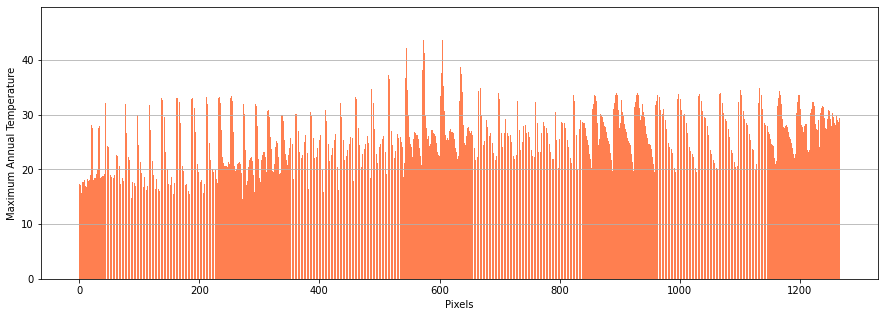

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(Y.index, X['Maximum Annual Temperature'], color='coral')
plt.xlabel('Pixels')
plt.ylabel('Maximum Annual Temperature')
plt.grid(axis='y')
#plt.savefig('Maximum Annual Temperature.png', dpi=520 , format='png', bbox_inches='tight')

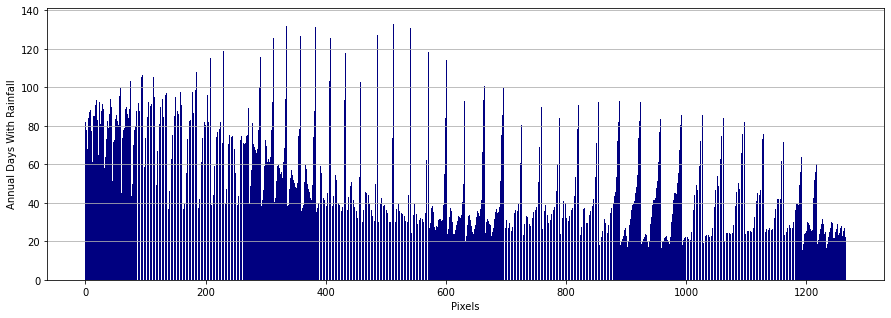

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(Y.index, X['Annual Days With Rainfall'], color='navy')
plt.xlabel('Pixels')
plt.ylabel('Annual Days With Rainfall')
plt.grid(axis='y')
#plt.savefig('Annual Days With Rainfall.png', dpi=520 , format='png', bbox_inches='tight')

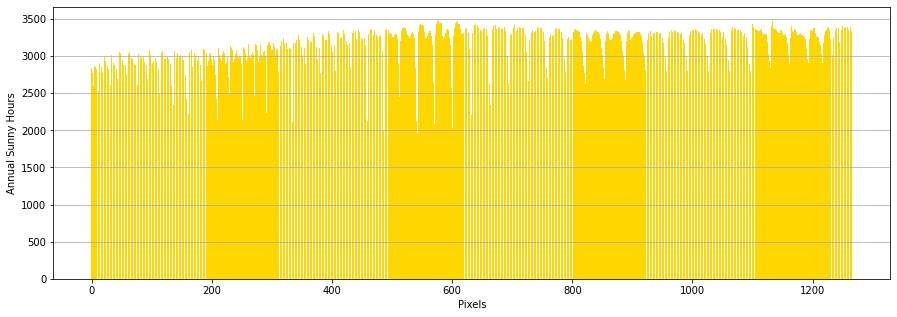

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(Y.index, X['Annual Sunny Hours'], color='gold')
plt.xlabel('Pixels')
plt.ylabel('Annual Sunny Hours')
plt.grid(axis='y')
#plt.savefig('Annual Sunny Hours.png', dpi=520 , format='png', bbox_inches='tight')

In [ ]:
mir = sklearn.feature_selection.mutual_info_regression(X,Y)
mir

array([0.37889765, 0.57064548, 0.21661972, 0.39042499, 0.41397875,
       0.58111461, 0.46513153, 0.25640029, 0.41987291, 0.21911297,
       0.11924142, 0.41987338, 0.37103051, 0.34788284, 0.35512538,
       0.35679075, 0.4036885 , 0.50102488, 0.22248724, 0.25791323])

In [ ]:
df_mir = pd.DataFrame(mir, X.columns, columns = ['mutual_info_regression'])
df2 = df_mir.sort_values(by=['mutual_info_regression'],ascending=False)
pd.set_option('display.max_rows', None)
print(df2)

                                                    mutual_info_regression
Maximum Annual Temperature                                        0.581115
Latitude                                                          0.570645
Annual Semi-Cloudy Days                                           0.501025
Annual Mean Temperature                                           0.465132
Annual Cloudy Days                                                0.419873
Annual Days With Rainfall                                         0.419873
Annual Freezing Days                                              0.413979
Annual Average Minimum Relative Humidity                          0.403689
Minimum Annual Temperature                                        0.390425
Longitude                                                         0.378898
Annual Sunny Hours                                                0.371031
Annual Average Relative Humidity                                  0.356791
Minimum Annual Absolute T

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state = 42)

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.3,random_state = 42)

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif["features"] = X1.columns
vif.round(1)

VIF Factor                       features
0        10.4        Annual Mean Temperature
1         7.6      Annual Days With Rainfall
2        13.1      Annual Average Wind Speed
3         6.6  Annual Days With Thunderstorm

**Outlier Detection**

In [ ]:
df_box = df.drop(['cell number', 'Range'], axis=1)

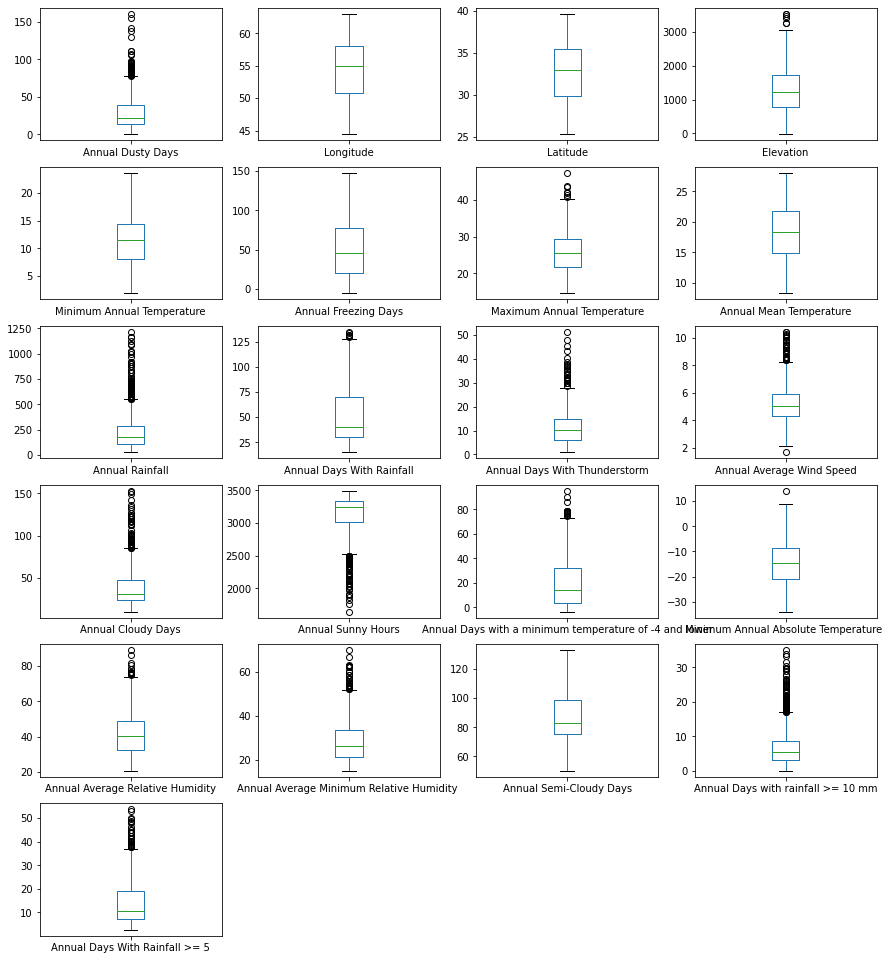

In [ ]:
df_box.plot.box(subplots=True,layout=(7,4), figsize=(15, 20))
#plt.savefig('/content/drive/My Drive/DM Project/box plots.png', dpi=520 , format='png', bbox_inches='tight')
plt.show()

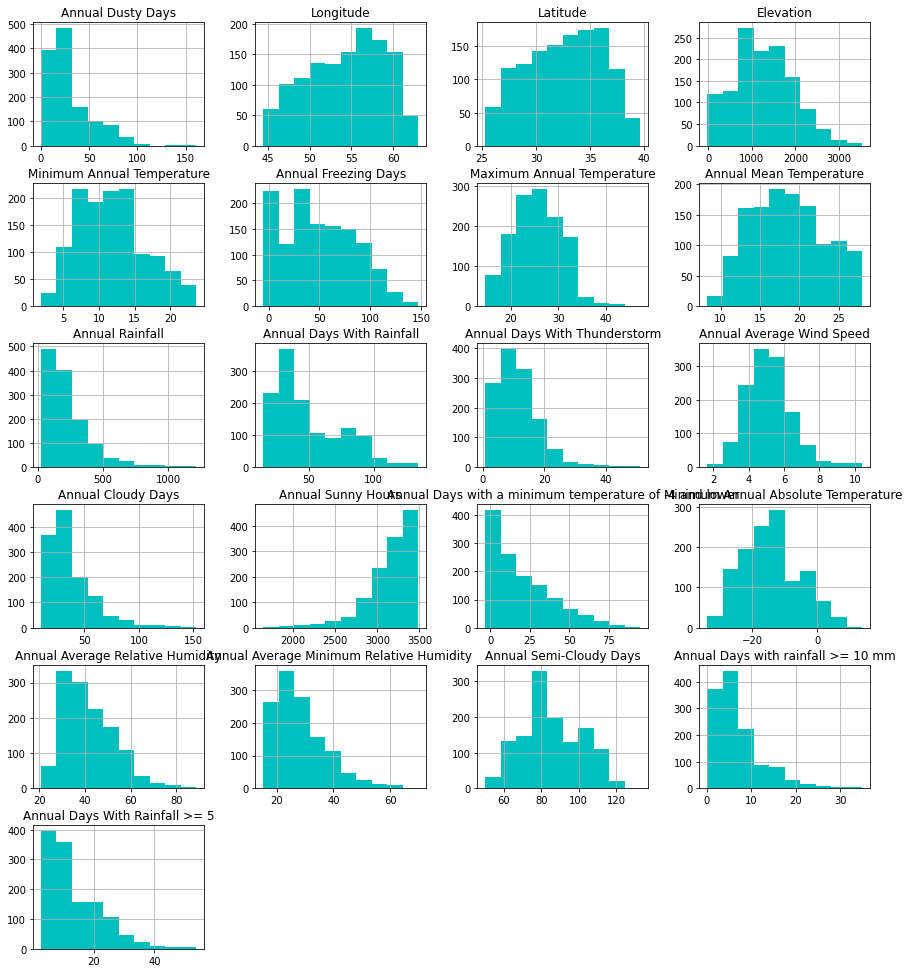

In [ ]:
df_box.hist(layout=(7,4), figsize=(15, 20), color='c')
#plt.savefig('/content/drive/My Drive/DM Project/Histograms.png', dpi=520 , format='png', bbox_inches='tight')
plt.show()

#OLS With Annual Dataset

**OLS (With 4 Variables)**

In [ ]:
X1 = sm.add_constant(X1) 

model = sm.OLS(y1_train, X1_train).fit()

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:      Annual Dusty Days   R-squared (uncentered):                   0.805
Model:                            OLS   Adj. R-squared (uncentered):              0.804
Method:                 Least Squares   F-statistic:                              911.1
Date:                Fri, 25 Jun 2021   Prob (F-statistic):                   2.07e-311
Time:                        08:47:39   Log-Likelihood:                         -3727.6
No. Observations:                 886   AIC:                                      7463.
Df Residuals:                     882   BIC:                                      7482.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [ ]:
predictions_OLS_test1 = model.predict(X1_test) 
predictions_OLS_train1 = model.predict(X1_train)

In [ ]:
r2_score(y1_test, predictions_OLS_test1)

0.4303159918589412

In [ ]:
print('MSE Test OLS:', metrics.mean_squared_error(y1_test, predictions_OLS_test1))
print('MSE Train OLS:', metrics.mean_squared_error(y1_train, predictions_OLS_train1))

print('RMSE Test OLS:', np.sqrt(metrics.mean_squared_error(y1_test, predictions_OLS_test1)))
print('RMSE Train OLS:', np.sqrt(metrics.mean_squared_error(y1_train, predictions_OLS_train1)))

print('MAE Test OLS:', metrics.mean_absolute_error(y1_test, predictions_OLS_test1))
print('MAE Train OLS:', metrics.mean_absolute_error(y1_train, predictions_OLS_train1))

MSE Test OLS: 339.1592124592079
MSE Train OLS: 264.1650262980739
RMSE Test OLS: 18.416275748891465
RMSE Train OLS: 16.253154349174004
MAE Test OLS: 13.234025942693885
MAE Train OLS: 12.1655543713197


**OLS(With All Annual Variables)**

In [ ]:
X = sm.add_constant(X) 

model = sm.OLS(y_train, X_train).fit()

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:      Annual Dusty Days   R-squared (uncentered):                   0.895
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              367.3
Date:                Fri, 25 Jun 2021   Prob (F-statistic):                        0.00
Time:                        08:47:39   Log-Likelihood:                         -3455.6
No. Observations:                 886   AIC:                                      6951.
Df Residuals:                     866   BIC:                                      7047.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                                                             coef    std err          t      P>|t|      [0.025      0.97

In [ ]:
predictions_OLS_test = model.predict(X_test) 
predictions_OLS_train = model.predict(X_train)

In [ ]:
print('MSE Test OLS:', metrics.mean_squared_error(y_test, predictions_OLS_test))
print('MSE Train OLS:', metrics.mean_squared_error(y_train, predictions_OLS_train))

print('RMSE Test OLS:', np.sqrt(metrics.mean_squared_error(y_test, predictions_OLS_test)))
print('RMSE Train OLS:', np.sqrt(metrics.mean_squared_error(y_train, predictions_OLS_train)))

print('MAE Test OLS:', metrics.mean_absolute_error(y_test, predictions_OLS_test))
print('MAE Train OLS:', metrics.mean_absolute_error(y_train, predictions_OLS_train))

MSE Test OLS: 208.40647016027359
MSE Train OLS: 142.9761431156415
RMSE Test OLS: 14.436290041429396
RMSE Train OLS: 11.957263195047664
MAE Test OLS: 9.886393766698651
MAE Train OLS: 8.501377015398798


Text(0, 0.5, 'OLS predictions')

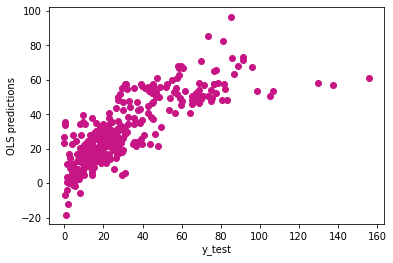

In [ ]:
plt.scatter(y_test,predictions_OLS_test,c='mediumvioletred')
plt.xlabel('y_test')
plt.ylabel('OLS predictions')
#plt.savefig('OLS predictions.png', dpi=520 , format='png', bbox_inches='tight')

#LASSO With Annual Dataset

In [ ]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

In [ ]:
alphas = 10**np.linspace(6,-2,50)*0.5
alphas

array([5.00000000e+05, 3.43324423e+05, 2.35743318e+05, 1.61872877e+05,
       1.11149824e+05, 7.63208984e+04, 5.24056567e+04, 3.59842837e+04,
       2.47085668e+04, 1.69661089e+04, 1.16497591e+04, 7.99929360e+03,
       5.49270571e+03, 3.77156003e+03, 2.58973734e+03, 1.77824015e+03,
       1.22102655e+03, 8.38416468e+02, 5.75697700e+02, 3.95302161e+02,
       2.71433772e+02, 1.86379686e+02, 1.27977396e+02, 8.78755312e+01,
       6.03396320e+01, 4.14321386e+01, 2.84493301e+01, 1.95346997e+01,
       1.34134790e+01, 9.21034985e+00, 6.32427608e+00, 4.34255687e+00,
       2.98181166e+00, 2.04745753e+00, 1.40588435e+00, 9.65348864e-01,
       6.62855683e-01, 4.55149089e-01, 3.12527596e-01, 2.14596713e-01,
       1.47352585e-01, 1.01179482e-01, 6.94747747e-02, 4.77047738e-02,
       3.27564278e-02, 2.24921633e-02, 1.54442180e-02, 1.06047544e-02,
       7.28174239e-03, 5.00000000e-03])

In [ ]:
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X,Y)
    coefs.append(lasso.coef_)
    
np.shape(coefs)

(50, 21)

In [ ]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
print("Alpha=", lassocv.alpha_)
lasso.fit(X_train, y_train)
lasso_pred_test = lasso.predict(X_test)
lasso_pred_train = lasso.predict(X_train)

Alpha= 0.0005526489137485241


In [ ]:
print("MSE Test LASSO = ",metrics.mean_squared_error(y_test, lasso.predict(X_test)))
print("MSE Train LASSO = ",metrics.mean_squared_error(y_train, lasso.predict(X_train)))

print("RMSE Test LASSO = ",np.sqrt(metrics.mean_squared_error(y_test, lasso.predict(X_test))))
print("RMSE Train LASSO = ",np.sqrt(metrics.mean_squared_error(y_train, lasso.predict(X_train))))

print("MAE Test LASSO = ", metrics.mean_absolute_error(y_test, lasso.predict(X_test)))
print("MAE Train LASSO = ",metrics.mean_absolute_error(y_train, lasso.predict(X_train)))

MSE Test LASSO =  202.79685787352219
MSE Train LASSO =  142.22189851573515
RMSE Test LASSO =  14.240676173325555
RMSE Train LASSO =  11.925682308184095
MAE Test LASSO =  9.770624931917418
MAE Train LASSO =  8.496734952449339


Text(0, 0.5, 'LASSO Predictions')

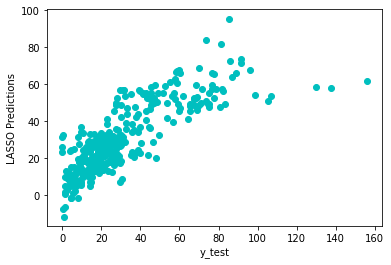

In [ ]:
plt.scatter(y_test,lasso_pred_test,c='c')
plt.xlabel('y_test')
plt.ylabel('LASSO Predictions')
#plt.savefig('LASSO predictions.png', dpi=520 , format='png', bbox_inches='tight')

#Ridge With Annual Dataset

In [ ]:
ridgecv = RidgeCV(alphas=alphas, normalize=True)
ridgecv.fit(X_train, y_train)
print("Alpha=", ridgecv.alpha_)
ridge6 = Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge6.fit(X_train, y_train)
ridge_pred_test = ridge6.predict(X_test)
ridge_pred_train = ridge6.predict(X_train)

Alpha= 0.005


In [ ]:
print("MSE Test Ridge = ",metrics.mean_squared_error(y_test, ridge6.predict(X_test)))
print("MSE Train Ridge = ",metrics.mean_squared_error(y_train, ridge6.predict(X_train)))

print("RMSE Test Ridge = ",np.sqrt(metrics.mean_squared_error(y_test, ridge6.predict(X_test))))
print("RMSE Train Ridge = ",np.sqrt(metrics.mean_squared_error(y_train, ridge6.predict(X_train))))

print("MAE Test Ridge = ", metrics.mean_absolute_error(y_test, ridge6.predict(X_test)))
print("MAE Train Ridge = ",metrics.mean_absolute_error(y_train, ridge6.predict(X_train)))

MSE Test Ridge =  204.85104851550722
MSE Train Ridge =  146.78797901391917
RMSE Test Ridge =  14.312618506601341
RMSE Train Ridge =  12.115608899841526
MAE Test Ridge =  9.744312510150653
MAE Train Ridge =  8.628397132906938


Text(0, 0.5, 'Ridge Predistions')

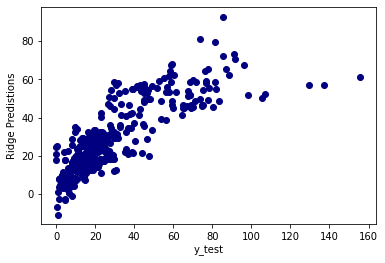

In [ ]:
plt.scatter(y_test,ridge_pred_test,c='navy')
plt.xlabel('y_test')
plt.ylabel('Ridge Predistions')
#plt.savefig('Ridge predictions.png', dpi=520 , format='png', bbox_inches='tight')

#Q Reg With Annual Dataset

In [ ]:
quantreg = sm.QuantReg(y_train, X_train)
res = quantreg.fit(q=.1)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:      Annual Dusty Days   Pseudo R-squared:               0.4476
Model:                       QuantReg   Bandwidth:                       4.313
Method:                 Least Squares   Sparsity:                        26.00
Date:                Fri, 25 Jun 2021   No. Observations:                  886
Time:                        08:47:42   Df Residuals:                      866
                                        Df Model:                           20
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Longitude                                                 -0.3623      0.075     -4.828      0.000      -0.510      -0.215
Latitude                                                  -1.6134      0.258  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [ ]:
quantreg = sm.QuantReg(y_train, X_train)
res = quantreg.fit(q=.7)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:      Annual Dusty Days   Pseudo R-squared:               0.5608
Model:                       QuantReg   Bandwidth:                       3.998
Method:                 Least Squares   Sparsity:                        21.33
Date:                Fri, 25 Jun 2021   No. Observations:                  886
Time:                        08:47:42   Df Residuals:                      866
                                        Df Model:                           20
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Longitude                                                  0.0816      0.114      0.715      0.475      -0.142       0.306
Latitude                                                  -1.8070      0.323  

In [ ]:
quantreg = sm.QuantReg(y_train, X_train)
res = quantreg.fit(q=.9)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:      Annual Dusty Days   Pseudo R-squared:               0.5849
Model:                       QuantReg   Bandwidth:                       5.563
Method:                 Least Squares   Sparsity:                        39.25
Date:                Fri, 25 Jun 2021   No. Observations:                  886
Time:                        08:47:42   Df Residuals:                      866
                                        Df Model:                           20
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Longitude                                                  0.3323      0.141      2.360      0.018       0.056       0.609
Latitude                                                  -3.1953      0.439  

In [ ]:
predictions_q9_test = res.predict(X_test) 
predictions_q9_train = res.predict(X_train) 

In [ ]:
print('MSE Test Q:', metrics.mean_squared_error(y_test, predictions_q9_test))
print('MSE Train Q:', metrics.mean_squared_error(y_train, predictions_q9_train))

print('RMSE Test Q:', np.sqrt(metrics.mean_squared_error(y_test, predictions_q9_test)))
print('RMSE Train Q:', np.sqrt(metrics.mean_squared_error(y_train, predictions_q9_train)))

print('MAE Test Q:', metrics.mean_absolute_error(y_test, predictions_q9_test))
print('MAE Train Q:', metrics.mean_absolute_error(y_train, predictions_q9_train))

MSE Test Q: 421.72371883744853
MSE Train Q: 397.99425098097987
RMSE Test Q: 20.53591290489538
RMSE Train Q: 19.94979325659742
MAE Test Q: 16.081668082527948
MAE Train Q: 15.142605426964716


Text(0, 0.5, 'Q 0.9 Predictions')

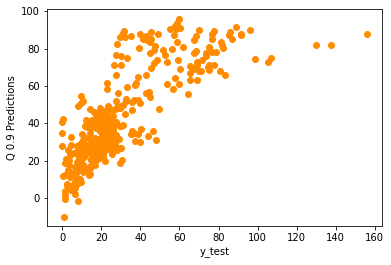

In [ ]:
plt.scatter(y_test,predictions_q9_test,c='darkorange')
plt.xlabel('y_test')
plt.ylabel('Q 0.9 Predictions')
#plt.savefig('Q 0.9 predictions.png', dpi=520 , format='png', bbox_inches='tight')

#Random Forest Reg With Annual Dataset

In [ ]:
model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(X_train,y_train)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [ ]:
r2_score(y_test, y_pred_test)

0.9307291050987195

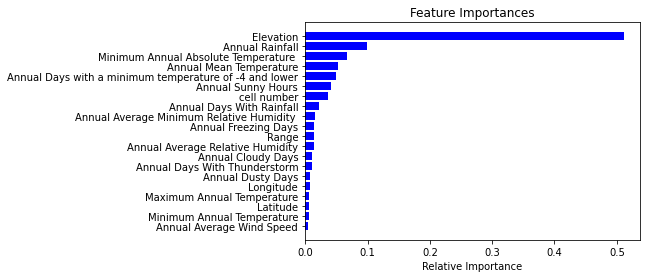

In [ ]:
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-20:]  
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
#plt.savefig('Feature Importance RF2.png', dpi=520 , format='png', bbox_inches='tight')

In [ ]:
print('MSE Test RF:', metrics.mean_squared_error(y_test, y_pred_test))
print('MSE Train RF:', metrics.mean_squared_error(y_train, y_pred_train))

print('RMSE Test RF:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('RMSE Train RF:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

print('MAE Test RF:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MAE Train RF:', metrics.mean_absolute_error(y_train, y_pred_train))

MSE Test RF: 41.240164416280315
MSE Train RF: 8.489999210794497
RMSE Test RF: 6.421850544530004
RMSE Train RF: 2.9137603214393764
MAE Test RF: 4.380797482500099
MAE Train RF: 2.0278842010330216


Text(0, 0.5, 'Random Forest Predictions')

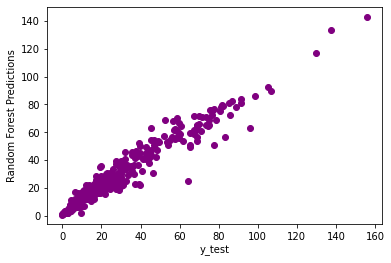

In [ ]:
plt.scatter(y_test,y_pred_test,c='purple')
plt.xlabel('y_test')
plt.ylabel('Random Forest Predictions')
#plt.savefig('Random Forest predictions.png', dpi=520 , format='png', bbox_inches='tight')

#Decision Tree Reg With Annual Dataset

In [ ]:
dt = DecisionTreeRegressor()
tr = dt.fit(X_train, y_train)
y_tr_pred_test = dt.predict(X_test)
y_tr_pred_train = dt.predict(X_train)

In [ ]:
print('MSE Test DT:', metrics.mean_squared_error(y_test, y_tr_pred_test))
print('MSE Train DT:', metrics.mean_squared_error(y_train, y_tr_pred_train))

print('RMSE Test DT:', np.sqrt(metrics.mean_squared_error(y_test, y_tr_pred_test)))
print('RMSE Train DT:', np.sqrt(metrics.mean_squared_error(y_train, y_tr_pred_train)))

print('MAE Test DT:', metrics.mean_absolute_error(y_test, y_tr_pred_test))
print('MAE Train DT:', metrics.mean_absolute_error(y_train, y_tr_pred_train))

MSE Test DT: 71.47515170603675
MSE Train DT: 0.0
RMSE Test DT: 8.454297824540886
RMSE Train DT: 0.0
MAE Test DT: 5.1956430446194215
MAE Train DT: 0.0


Text(0, 0.5, 'Decision Tree Regressor Predictions')

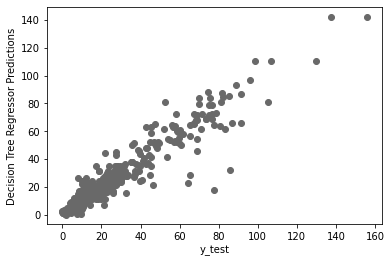

In [ ]:
plt.scatter(y_test, y_tr_pred_test, c='dimgray')
plt.xlabel('y_test')
plt.ylabel('Decision Tree Regressor Predictions')
#plt.savefig('Decision Tree Regressor Predictions.png', dpi=520 , format='png', bbox_inches='tight')

#KNN Reg With Annual Dataset

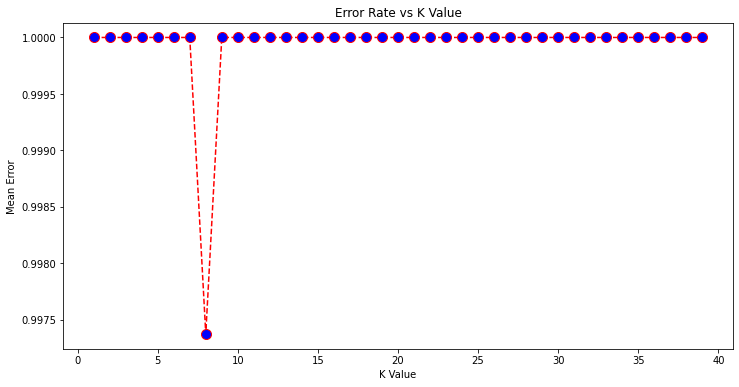

In [ ]:
error = []
for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
#plt.savefig('KNN Reg.png', dpi=520, format='png', bbox_inches='tight')
plt.show()

In [ ]:
knn_reg = KNeighborsRegressor(n_neighbors=8)
knn_reg = knn_reg.fit(X_train,y_train)
knn_pred_test = knn_reg.predict(X_test)
knn_pred_train = knn_reg.predict(X_train)

In [ ]:
print('MSE Test KNN:', metrics.mean_squared_error(y_test, knn_pred_test))
print('MSE Train KNN:', metrics.mean_squared_error(y_train, knn_pred_train))

print('RMSE Test KNN:', np.sqrt(metrics.mean_squared_error(y_test, knn_pred_test)))
print('RMSE Train KNN:', np.sqrt(metrics.mean_squared_error(y_train, knn_pred_train)))

print('MAE Test KNN:', metrics.mean_absolute_error(y_test, knn_pred_test))
print('MAE Train KNN:', metrics.mean_absolute_error(y_train, knn_pred_train))

MSE Test KNN: 261.65040667240817
MSE Train KNN: 168.9683376675367
RMSE Test KNN: 16.17561147754261
RMSE Train KNN: 12.998782160938644
MAE Test KNN: 11.074340551181102
MAE Train KNN: 9.111028498871333


Text(0, 0.5, 'KNN Regressor Predictions')

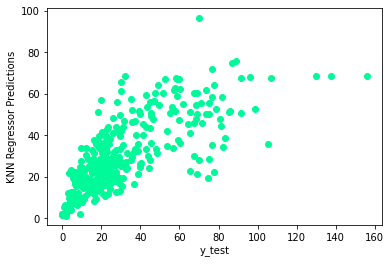

In [ ]:
plt.scatter(y_test, knn_pred_test, c='mediumspringgreen')
plt.xlabel('y_test')
plt.ylabel('KNN Regressor Predictions')
#plt.savefig('KNN Regressor Predictions.png', dpi=520 , format='png', bbox_inches='tight')

#Final Results for Annual Dataset Reg

In [ ]:
def foo (X,Y):
  s = list((x,y) for x, y in zip(X, Y))
  s = sorted(s)
  s = np.array(s)
  X = s[:, 0]
  Y = s[:, 1]
  return X,Y

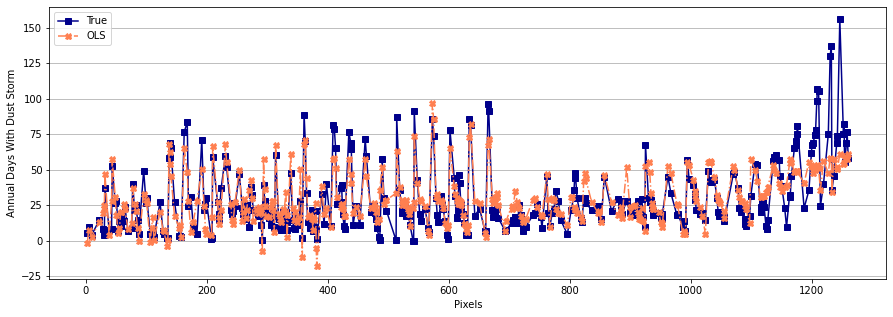

In [ ]:
plt.figure(figsize=(15,5))
tx, ty = foo(y_test.index, y_test.values)
plt.plot(tx, ty, label='True',color='darkblue', marker='s')
tx, ty = foo(y_test.index, predictions_OLS_test.values)
plt.plot(tx, ty, label='OLS', linestyle='dashdot',color='coral', marker="X")
plt.xlabel('Pixels')
plt.ylabel('Annual Days With Dust Storm')
plt.legend()
plt.grid(axis='y')
#plt.savefig('OLS_Y.png', dpi=520 , format='png', bbox_inches='tight')

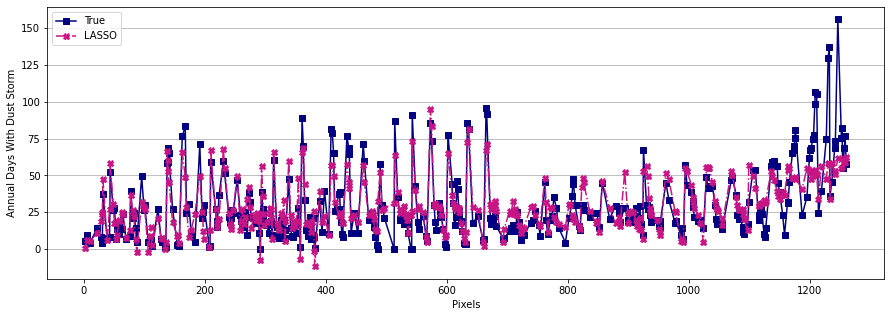

In [ ]:
plt.figure(figsize=(15,5))
tx, ty = foo(y_test.index, y_test.values)
plt.plot(tx, ty, label='True', marker='s', color='navy')
tx, ty = foo(y_test.index, lasso_pred_test)
plt.plot(tx, ty, label='LASSO', linestyle='dashdot', marker='X',color='mediumvioletred')
plt.xlabel('Pixels')
plt.ylabel('Annual Days With Dust Storm')
plt.legend()
plt.grid(axis='y')
#plt.savefig('LASSO_Y.png', dpi=520 , format='png', bbox_inches='tight')

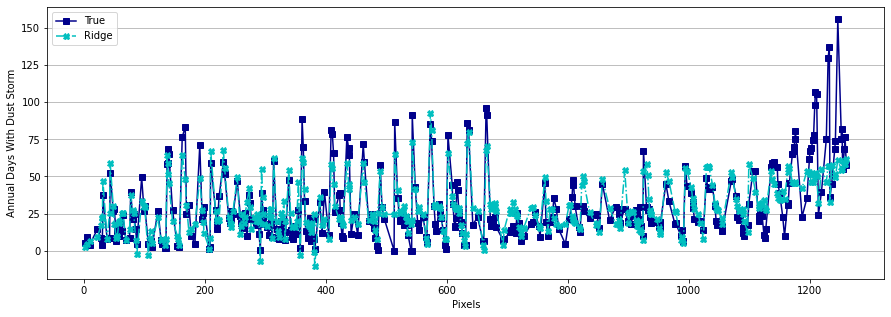

In [ ]:
plt.figure(figsize=(15,5))
tx, ty = foo(y_test.index, y_test.values)
plt.plot(tx, ty, label='True',color='darkblue', marker='s')
tx, ty = foo(y_test.index, ridge_pred_test)
plt.plot(tx, ty, label='Ridge', linestyle='dashdot', color='c', marker='X')
plt.xlabel('Pixels')
plt.ylabel('Annual Days With Dust Storm')
plt.legend()
plt.grid(axis='y')
#plt.savefig('Ridge_Y.png', dpi=520 , format='png', bbox_inches='tight')

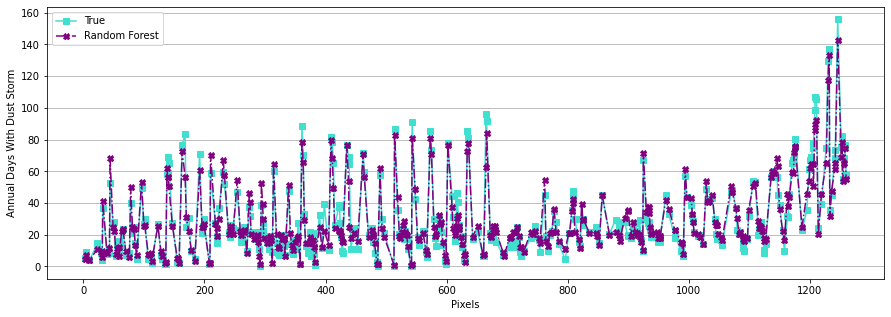

In [ ]:
plt.figure(figsize=(15,5))
tx, ty = foo(y_test.index, y_test.values)
plt.plot(tx, ty, label='True',color='turquoise', marker='s')
tx, ty = foo(y_test.index, y_pred_test)
plt.plot(tx, ty, label='Random Forest', linestyle='dashdot',color='purple', marker='X')
plt.xlabel('Pixels')
plt.ylabel('Annual Days With Dust Storm')
plt.legend()
plt.grid(axis='y')
#plt.savefig('RF_Y.png', dpi=520 , format='png', bbox_inches='tight')

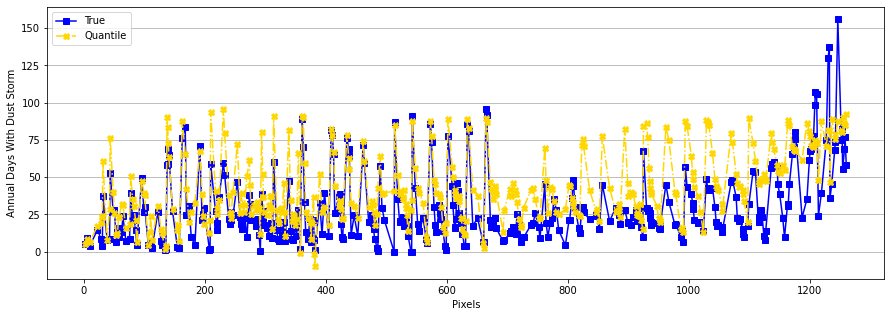

In [ ]:
plt.figure(figsize=(15,5))
tx, ty = foo(y_test.index, y_test.values)
plt.plot(tx, ty, label='True',color='b', marker='s')
tx, ty = foo(y_test.index, predictions_q9_test)
plt.plot(tx, ty, label='Quantile', linestyle='dashdot',color='gold', marker='X')
plt.xlabel('Pixels')
plt.ylabel('Annual Days With Dust Storm')
plt.legend()
plt.grid(axis='y')
#plt.savefig('Q0.9_Y.png', dpi=520 , format='png', bbox_inches='tight')

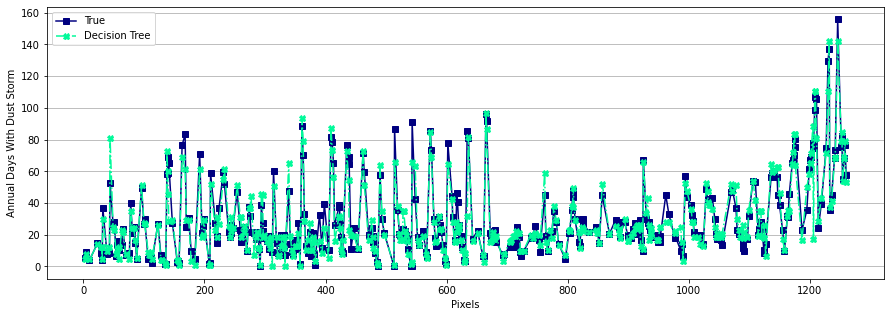

In [ ]:
plt.figure(figsize=(15,5))
tx, ty = foo(y_test.index, y_test.values)
plt.plot(tx, ty, label='True',color='navy', marker='s')
tx, ty = foo(y_test.index, y_tr_pred_test)
plt.plot(tx, ty, label='Decision Tree', linestyle='dashdot',color='mediumspringgreen', marker='X')
plt.xlabel('Pixels')
plt.ylabel('Annual Days With Dust Storm')
plt.legend()
plt.grid(axis='y')
#plt.savefig('DTree.png', dpi=520 , format='png', bbox_inches='tight')

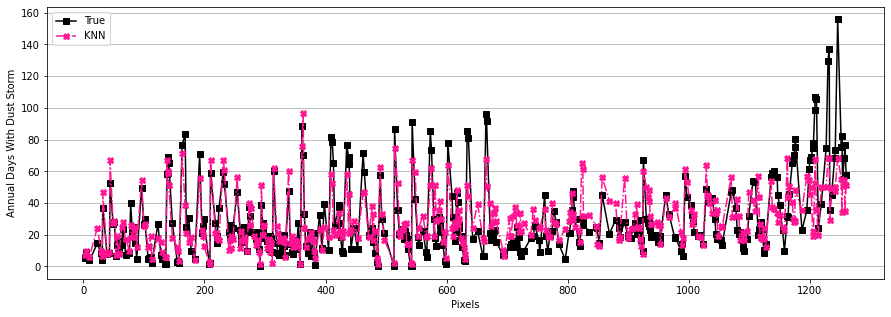

In [ ]:
plt.figure(figsize=(15,5))
tx, ty = foo(y_test.index, y_test.values)
plt.plot(tx, ty, label='True',color='black', marker='s')
tx, ty = foo(y_test.index, knn_pred_test)
plt.plot(tx, ty, label='KNN', linestyle='dashdot',color='deeppink', marker='X')
plt.xlabel('Pixels')
plt.ylabel('Annual Days With Dust Storm')
plt.legend()
plt.grid(axis='y')
#plt.savefig('KNN_Reg.png', dpi=520 , format='png', bbox_inches='tight')

#Clustering Annual Dataset

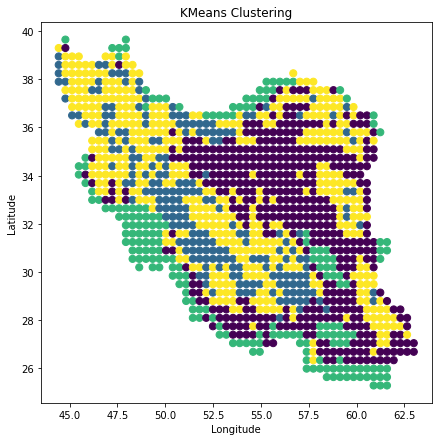

In [ ]:
kmeans = KMeans(n_clusters=4)
X_kmeans = X.values
k_means = kmeans.fit(X_kmeans)
y_kmeans = kmeans.predict(X_kmeans)
plt.figure(figsize=(7, 7))
plt.scatter(X_kmeans[:, 1], X_kmeans[:, 2], c=y_kmeans, s=50, cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('KMeans Clustering')
#plt.savefig('KMeans_yearly.png', dpi=520 , format='png', bbox_inches='tight')
plt.show()

In [ ]:
df_clustered = df.assign(Cluster = y_kmeans)
df_clustered.head()

cell number    Range  ...  Annual Days With Rainfall >= 5  Cluster
0            1  [1, 15)  ...                           21.36        1
1            2  [1, 15)  ...                           20.11        1
2            3  [1, 15)  ...                           20.29        1
3            4  [1, 15)  ...                           20.60        1
4            5  [1, 15)  ...                           20.95        3

[5 rows x 24 columns]

Agglomerative Clustering 

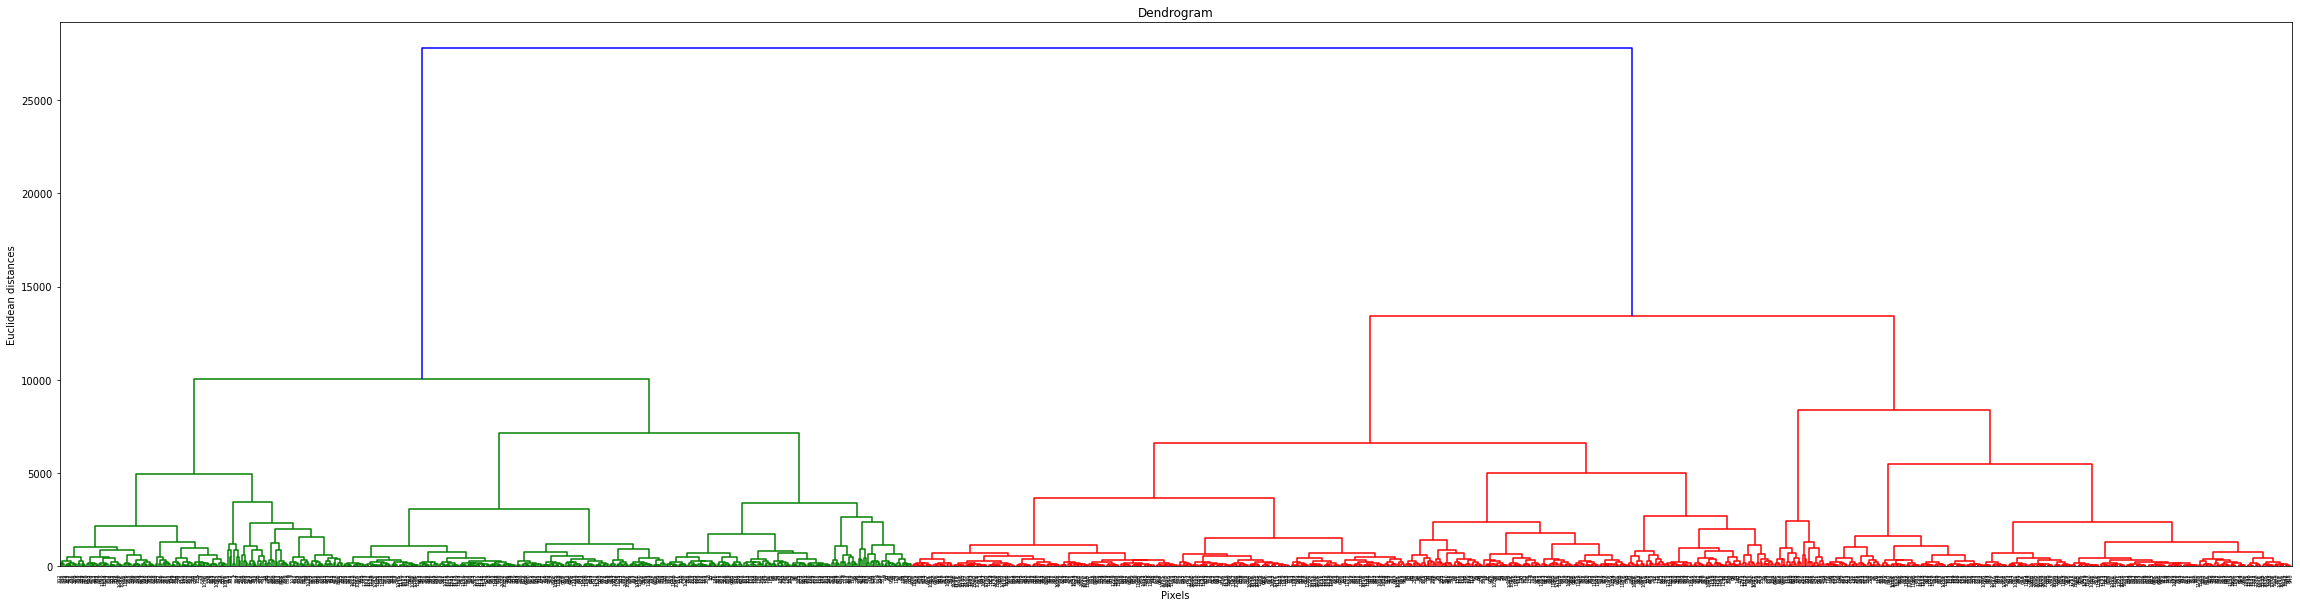

In [ ]:
plt.figure(figsize=(40,10))
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.xlabel('Pixels')
plt.ylabel('Euclidean distances')
plt.title('Dendrogram')
#plt.savefig('Dendrogram.png', dpi=520 , format='png', bbox_inches='tight')
plt.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters =4 , affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(X)

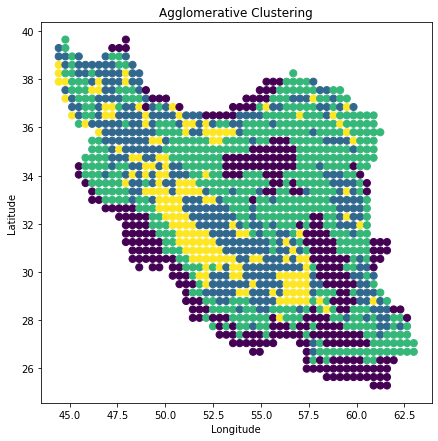

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(X_kmeans[:, 1], X_kmeans[:, 2], c=y_hc, s=50)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Agglomerative Clustering')
#plt.savefig('Agglomerative Clustering.png', dpi=520 , format='png', bbox_inches='tight')
plt.show()

#Clustered Regression With Annual Dataset

In [ ]:
df_cluster0 = df_clustered[df_clustered.Cluster == 0]
df_cluster1 = df_clustered[df_clustered.Cluster == 1]
df_cluster2 = df_clustered[df_clustered.Cluster == 2]
df_cluster3 = df_clustered[df_clustered.Cluster == 3]

In [ ]:
X_cluster0 = df_cluster0.iloc[: , 3:23]
Y_cluster0 = df_cluster0['Annual Dusty Days']
X_cluster1 = df_cluster1.iloc[: , 3:23]
Y_cluster1 = df_cluster1['Annual Dusty Days']
X_cluster2 = df_cluster2.iloc[: , 3:23]
Y_cluster2 = df_cluster2['Annual Dusty Days']
X_cluster3 = df_cluster3.iloc[: , 3:23]
Y_cluster3 = df_cluster3['Annual Dusty Days']

In [ ]:
X_train_cluster0, X_test_cluster0, y_train_cluster0, y_test_cluster0 = train_test_split(X_cluster0, Y_cluster0, test_size=0.3,random_state = 42)
X_train_cluster1, X_test_cluster1, y_train_cluster1, y_test_cluster1 = train_test_split(X_cluster1, Y_cluster1, test_size=0.3,random_state = 42)
X_train_cluster2, X_test_cluster2, y_train_cluster2, y_test_cluster2 = train_test_split(X_cluster2, Y_cluster2, test_size=0.3,random_state = 42)
X_train_cluster3, X_test_cluster3, y_train_cluster3, y_test_cluster3 = train_test_split(X_cluster3, Y_cluster3, test_size=0.3,random_state = 42)

In [ ]:
X_cluster0 = sm.add_constant(X_cluster0) 
model_cluster0 = sm.OLS(y_train_cluster0, X_train_cluster0).fit()
print_model_cluster0 = model_cluster0.summary()
print(print_model_cluster0)

                                 OLS Regression Results                                
Dep. Variable:      Annual Dusty Days   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.918
Method:                 Least Squares   F-statistic:                              168.2
Date:                Fri, 25 Jun 2021   Prob (F-statistic):                   4.03e-142
Time:                        08:48:19   Log-Likelihood:                         -1132.0
No. Observations:                 297   AIC:                                      2304.
Df Residuals:                     277   BIC:                                      2378.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                                                             coef    std err          t      P>|t|      [0.025      0.97

In [ ]:
predictions_model_cluster0 = model_cluster0.predict(X_test_cluster0) 

print('RMSE Test KNN:', np.sqrt(metrics.mean_squared_error(y_test_cluster0, predictions_model_cluster0)))
print('MAE Test KNN:', metrics.mean_absolute_error(y_test_cluster0, predictions_model_cluster0))

RMSE Test KNN: 10.495682324475306
MAE Test KNN: 7.535649847590443


In [ ]:
X_cluster1 = sm.add_constant(X_cluster1) 
model_cluster1 = sm.OLS(y_train_cluster1, X_train_cluster1).fit()
print_model_cluster1 = model_cluster1.summary()
print(print_model_cluster1)

                                 OLS Regression Results                                
Dep. Variable:      Annual Dusty Days   R-squared (uncentered):                   0.885
Model:                            OLS   Adj. R-squared (uncentered):              0.867
Method:                 Least Squares   F-statistic:                              48.39
Date:                Fri, 25 Jun 2021   Prob (F-statistic):                    2.13e-49
Time:                        08:48:19   Log-Likelihood:                         -487.86
No. Observations:                 146   AIC:                                      1016.
Df Residuals:                     126   BIC:                                      1075.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                                                             coef    std err          t      P>|t|      [0.025      0.97

In [ ]:
predictions_model_cluster1 = model_cluster1.predict(X_test_cluster1) 

print('RMSE Test KNN:', np.sqrt(metrics.mean_squared_error(y_test_cluster1, predictions_model_cluster1)))
print('MAE Test KNN:', metrics.mean_absolute_error(y_test_cluster1, predictions_model_cluster1))

RMSE Test KNN: 8.256009205287123
MAE Test KNN: 5.625487435002423


In [ ]:
X_cluster2 = sm.add_constant(X_cluster2) 
model_cluster2 = sm.OLS(y_train_cluster2, X_train_cluster2).fit()
print_model_cluster2 = model_cluster2.summary()
print(print_model_cluster2)

                                 OLS Regression Results                                
Dep. Variable:      Annual Dusty Days   R-squared (uncentered):                   0.923
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              68.50
Date:                Fri, 25 Jun 2021   Prob (F-statistic):                    2.54e-54
Time:                        08:48:19   Log-Likelihood:                         -561.97
No. Observations:                 135   AIC:                                      1164.
Df Residuals:                     115   BIC:                                      1222.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                                                             coef    std err          t      P>|t|      [0.025      0.97

In [ ]:
predictions_model_cluster2 = model_cluster2.predict(X_test_cluster2) 

print('RMSE Test KNN:', np.sqrt(metrics.mean_squared_error(y_test_cluster2, predictions_model_cluster2)))
print('MAE Test KNN:', metrics.mean_absolute_error(y_test_cluster2, predictions_model_cluster2))

RMSE Test KNN: 14.950295740920868
MAE Test KNN: 10.896070785692837


In [ ]:
X_cluster3 = sm.add_constant(X_cluster3) 
model_cluster3 = sm.OLS(y_train_cluster3, X_train_cluster3).fit()
print_model_cluster3 = model_cluster3.summary()
print(print_model_cluster3)

                                 OLS Regression Results                                
Dep. Variable:      Annual Dusty Days   R-squared (uncentered):                   0.914
Model:                            OLS   Adj. R-squared (uncentered):              0.908
Method:                 Least Squares   F-statistic:                              153.1
Date:                Fri, 25 Jun 2021   Prob (F-statistic):                   3.18e-140
Time:                        08:48:19   Log-Likelihood:                         -1096.6
No. Observations:                 307   AIC:                                      2233.
Df Residuals:                     287   BIC:                                      2308.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                                                             coef    std err          t      P>|t|      [0.025      0.97

In [ ]:
predictions_model_cluster3 = model_cluster3.predict(X_test_cluster3) 

print('RMSE Test KNN:', np.sqrt(metrics.mean_squared_error(y_test_cluster3, predictions_model_cluster3)))
print('MAE Test KNN:', metrics.mean_absolute_error(y_test_cluster3, predictions_model_cluster3))

RMSE Test KNN: 9.43012701382544
MAE Test KNN: 7.434584341056158


#Classification With Range For Annual Dataset

**KNN**

In [ ]:
X_class = df.iloc[: , 3:]
Y_class = df['Range']

In [ ]:
X_class_train, X_class_test, Y_class_train, Y_class_test = train_test_split(X_class, Y_class, test_size=0.3, random_state=101)

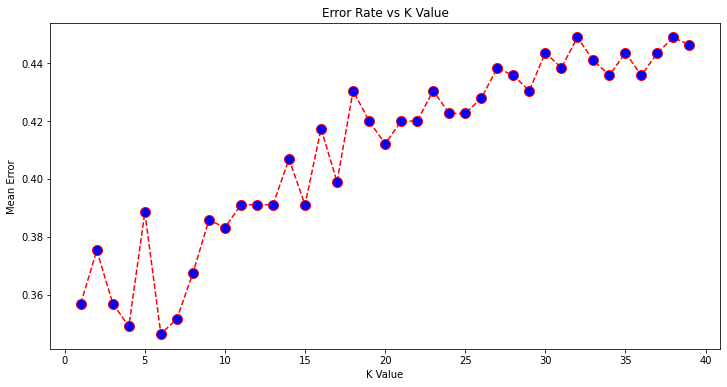

In [ ]:
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_class_train, Y_class_train)
    pred_i = knn.predict(X_class_test)
    error.append(np.mean(pred_i != Y_class_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
#plt.savefig('K_Yearly.png', dpi=520, format='png', bbox_inches='tight')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_class_train,Y_class_train)
knn_pred = knn.predict(X_class_test)
print(classification_report(Y_class_test, knn_pred))
print(confusion_matrix(Y_class_test, knn_pred))

              precision    recall  f1-score   support

     [1, 15)       0.78      0.74      0.76       118
    [15, 30)       0.59      0.76      0.66       135
    [30, 60)       0.56      0.44      0.49        79
   [60, 170)       0.72      0.47      0.57        49

    accuracy                           0.65       381
   macro avg       0.66      0.60      0.62       381
weighted avg       0.66      0.65      0.64       381

[[ 87  31   0   0]
 [ 20 102  11   2]
 [  5  32  35   7]
 [  0   9  17  23]]


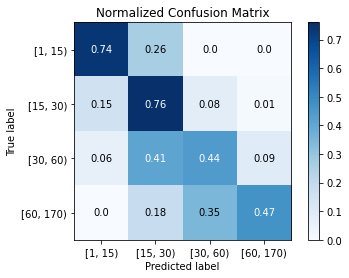

In [ ]:
skplt.metrics.plot_confusion_matrix(Y_class_test, knn_pred, normalize=True)
#plt.savefig('KNN_Yearly.png', dpi=520 , format='png', bbox_inches='tight')
plt.show()

**LDA**

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_class_train, Y_class_train)
lda_pred = lda.predict(X_class_test)
print(classification_report(Y_class_test, lda_pred))
print(confusion_matrix(Y_class_test,lda_pred))

              precision    recall  f1-score   support

     [1, 15)       0.84      0.81      0.83       118
    [15, 30)       0.69      0.81      0.75       135
    [30, 60)       0.67      0.54      0.60        79
   [60, 170)       0.77      0.69      0.73        49

    accuracy                           0.74       381
   macro avg       0.74      0.72      0.73       381
weighted avg       0.74      0.74      0.74       381

[[ 96  22   0   0]
 [ 17 110   7   1]
 [  1  26  43   9]
 [  0   1  14  34]]


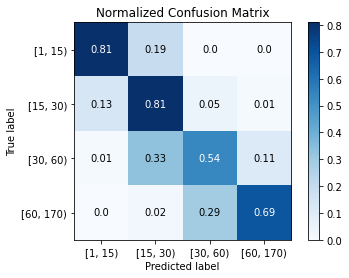

In [ ]:
skplt.metrics.plot_confusion_matrix(Y_class_test, lda_pred, normalize=True)
#plt.savefig('LDA_Yearly.png', dpi=520 , format='png', bbox_inches='tight')
plt.show()

**Decision Tree**

In [ ]:
dtree = DecisionTreeClassifier()
tree = dtree.fit(X_class_train, Y_class_train)
tree_pred = dtree.predict(X_class_test)
print(classification_report(Y_class_test, tree_pred))
print(confusion_matrix(Y_class_test,tree_pred))

              precision    recall  f1-score   support

     [1, 15)       0.86      0.86      0.86       118
    [15, 30)       0.76      0.80      0.78       135
    [30, 60)       0.77      0.75      0.76        79
   [60, 170)       0.93      0.84      0.88        49

    accuracy                           0.81       381
   macro avg       0.83      0.81      0.82       381
weighted avg       0.81      0.81      0.81       381

[[101  16   1   0]
 [ 16 108   9   2]
 [  1  18  59   1]
 [  0   0   8  41]]


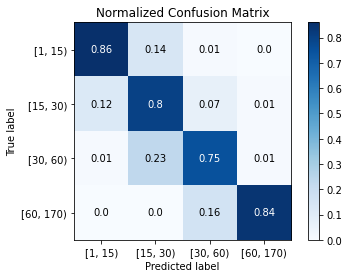

In [ ]:
skplt.metrics.plot_confusion_matrix(Y_class_test, tree_pred, normalize=True)
#plt.savefig('TREE_Yearly.png', dpi=520 , format='png', bbox_inches='tight')
plt.show()

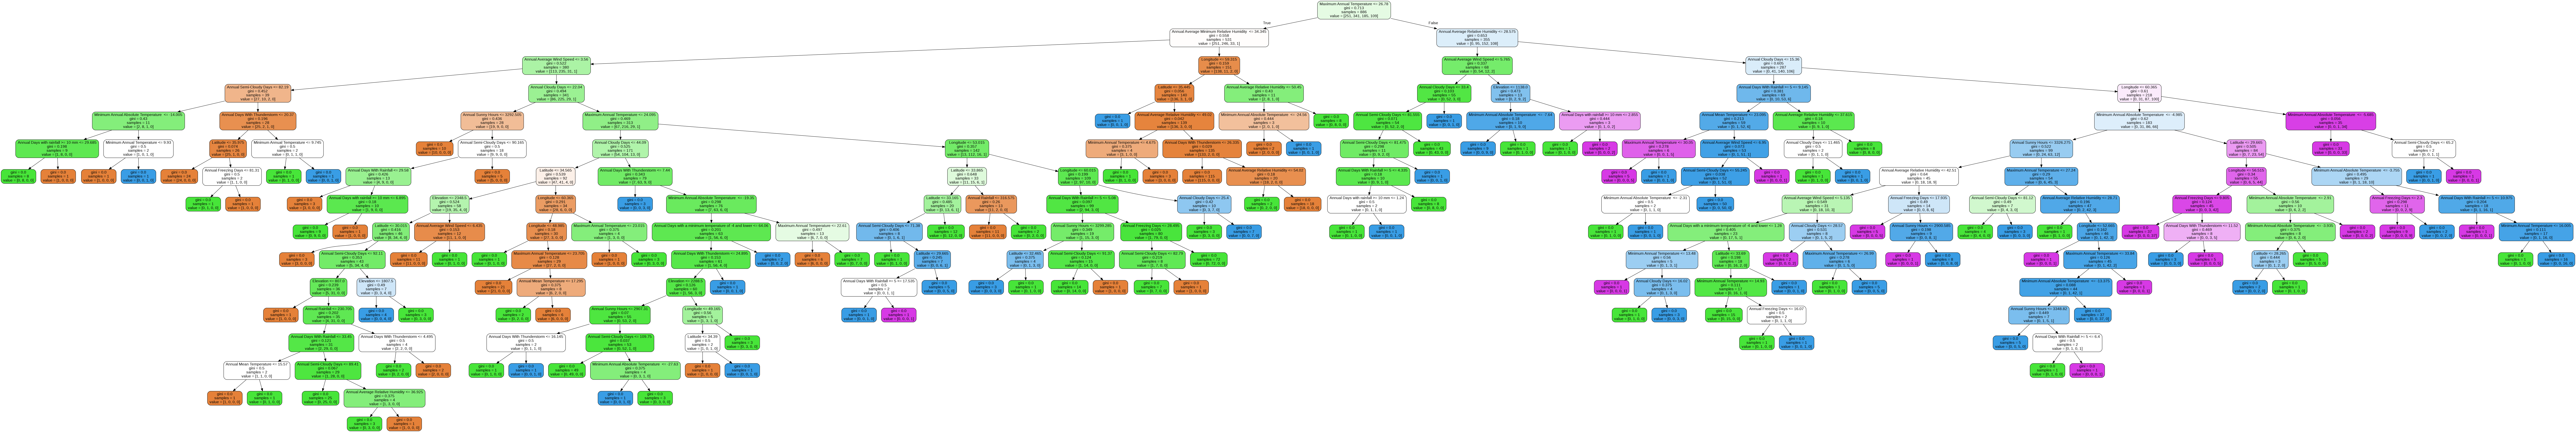

In [ ]:
features = list(X_class.columns[:])
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

**Random Forest**

In [ ]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_class_train, Y_class_train)
rf_pred = rf.predict(X_class_test)
print(classification_report(Y_class_test, rf_pred))
print(confusion_matrix(Y_class_test, rf_pred))

              precision    recall  f1-score   support

     [1, 15)       0.88      0.87      0.88       118
    [15, 30)       0.78      0.86      0.82       135
    [30, 60)       0.85      0.73      0.79        79
   [60, 170)       0.94      0.92      0.93        49

    accuracy                           0.85       381
   macro avg       0.86      0.85      0.85       381
weighted avg       0.85      0.85      0.84       381

[[103  15   0   0]
 [ 13 116   6   0]
 [  1  17  58   3]
 [  0   0   4  45]]


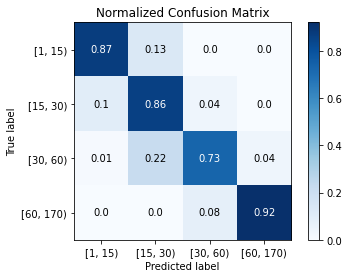

In [ ]:
skplt.metrics.plot_confusion_matrix(Y_class_test, rf_pred, normalize=True)
#plt.savefig('RF_Yearly.png', dpi=520 , format='png', bbox_inches='tight')
plt.show()

**Gaussian Naive Bayes**

In [ ]:
gnb = GaussianNB()
gnb.fit(X_class_train, Y_class_train)
gnb_pred = gnb.predict(X_class_test)
print(classification_report(Y_class_test, gnb_pred))
print(confusion_matrix(Y_class_test, gnb_pred))

              precision    recall  f1-score   support

     [1, 15)       0.67      0.68      0.68       118
    [15, 30)       0.54      0.59      0.56       135
    [30, 60)       0.30      0.11      0.17        79
   [60, 170)       0.41      0.73      0.53        49

    accuracy                           0.54       381
   macro avg       0.48      0.53      0.48       381
weighted avg       0.52      0.54      0.51       381

[[80 38  0  0]
 [34 79 12 10]
 [ 5 24  9 41]
 [ 0  4  9 36]]


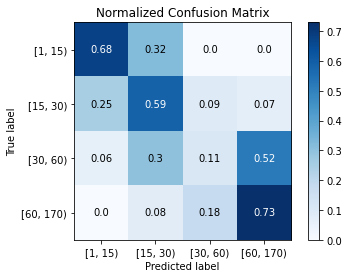

In [ ]:
skplt.metrics.plot_confusion_matrix(Y_class_test, gnb_pred, normalize=True)
#plt.savefig('GNB_Yearly.png', dpi=520 , format='png', bbox_inches='tight')
plt.show()

**Support Vector Machine**

In [ ]:
svm = SVC()
svm.fit(X_class_train, Y_class_train)
svm_pred = svm.predict(X_class_test)
print(classification_report(Y_class_test, svm_pred))
print(confusion_matrix(Y_class_test, svm_pred))

              precision    recall  f1-score   support

     [1, 15)       0.74      0.64      0.68       118
    [15, 30)       0.47      0.78      0.58       135
    [30, 60)       0.41      0.28      0.33        79
   [60, 170)       0.00      0.00      0.00        49

    accuracy                           0.53       381
   macro avg       0.40      0.42      0.40       381
weighted avg       0.48      0.53      0.49       381

[[ 75  43   0   0]
 [ 21 105   9   0]
 [  6  51  22   0]
 [  0  26  23   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


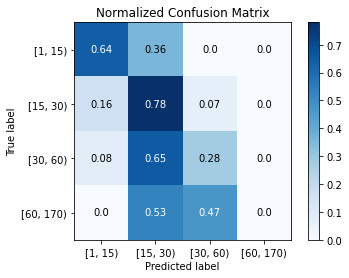

In [ ]:
skplt.metrics.plot_confusion_matrix(Y_class_test, svm_pred, normalize=True)
#plt.savefig('SVM_Yearly.png', dpi=520 , format='png', bbox_inches='tight')
plt.show()

#KNN For Cluster Prediction For Annual Dataset

In [ ]:
X_clustered = df_clustered.iloc[: , 3:6]
Y_clustered = df_clustered['Cluster']
X_clustered.head()

Longitude  Latitude  Elevation
0      44.43     37.90       2441
1      44.43     38.25       2959
2      44.43     38.60       2983
3      44.43     38.95       2366
4      44.43     39.30       1341

In [ ]:
X_clustered_train, X_clustered_test, Y_clustered_train, Y_clustered_test = train_test_split(X_clustered, Y_clustered, test_size=0.3, random_state=101)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_clustered_train,Y_clustered_train)
clustered_pred = knn.predict(X_clustered_test)
print(classification_report(Y_clustered_test, clustered_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       121
           1       0.98      1.00      0.99        59
           2       1.00      0.86      0.92        64
           3       0.95      0.94      0.95       137

    accuracy                           0.94       381
   macro avg       0.95      0.94      0.94       381
weighted avg       0.94      0.94      0.94       381

